In [6]:
# Import Libraries
import numpy as np # For numerical operations
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting
import statsmodels.api as sm # For statistical modeling
from scipy import stats # For statistical tests
from statsmodels.stats.outliers_influence import variance_inflation_factor # For checking multicollinearity
from statsmodels.stats.diagnostic import het_breuschpagan # For checking heteroscedasticity
from statsmodels.stats.stattools import durbin_watson # For checking autocorrelation
from linearmodels.panel import PanelOLS # For performing regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'linearmodels'

In [7]:
# Load data
df = pd.read_csv('DATA IFDI - drop.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'DATA IFDI - drop.csv'

In [ ]:
X = df.drop(columns=['IFDI (%)'])
y = df['IFDI (%)']

In [5]:
# List of independent variables (assume columns named 'X1', 'X2', 'X3', etc.)
  x_columns = ['Inflation', 'GDP growth (%)', 'Population','Human Capital','Infrastructure',
              'GDP','corruption','regulation','political stability','rule of law','accountability',
              'government','labor force','inflation -2','GDP per capita','Financial Development',
              'Financial Insitutions','FI Deepening']

for predictor in x_columns:
    X1 = df[[predictor]]
    X1 = sm.add_constant(X1)  # Add intercept

    # Fit the regression model
    model = sm.OLS(y, X1).fit()

    # Extract and print the p-value for the predictor
    p_value = model.pvalues[predictor]
    print(f"P-value for {predictor}: {p_value}")

IndentationError: unexpected indent (<ipython-input-5-1222d5eb7659>, line 2)

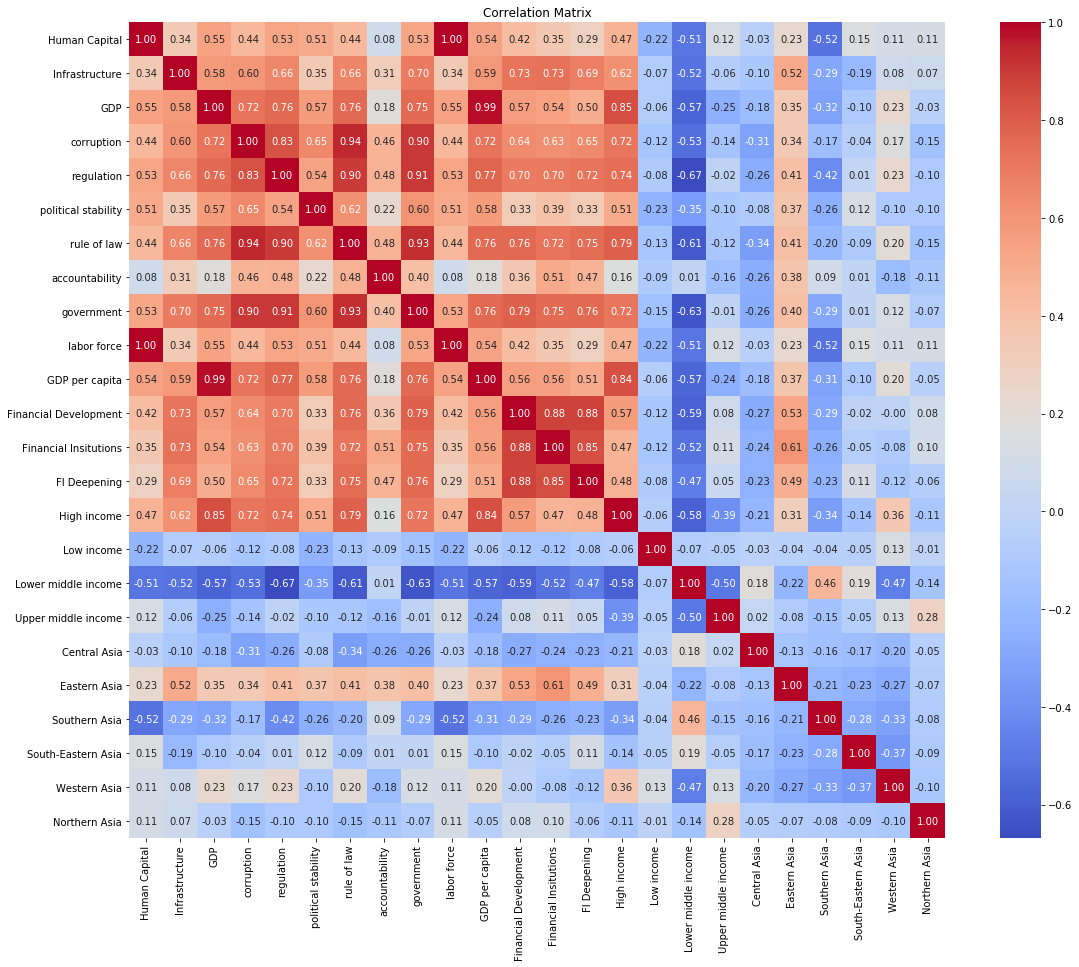

In [ ]:
# Threshold p value > 0.01
X2 = X.drop(columns=['Inflation','GDP growth (%)','Population','inflation -2'])
correlation_matrix = X2.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

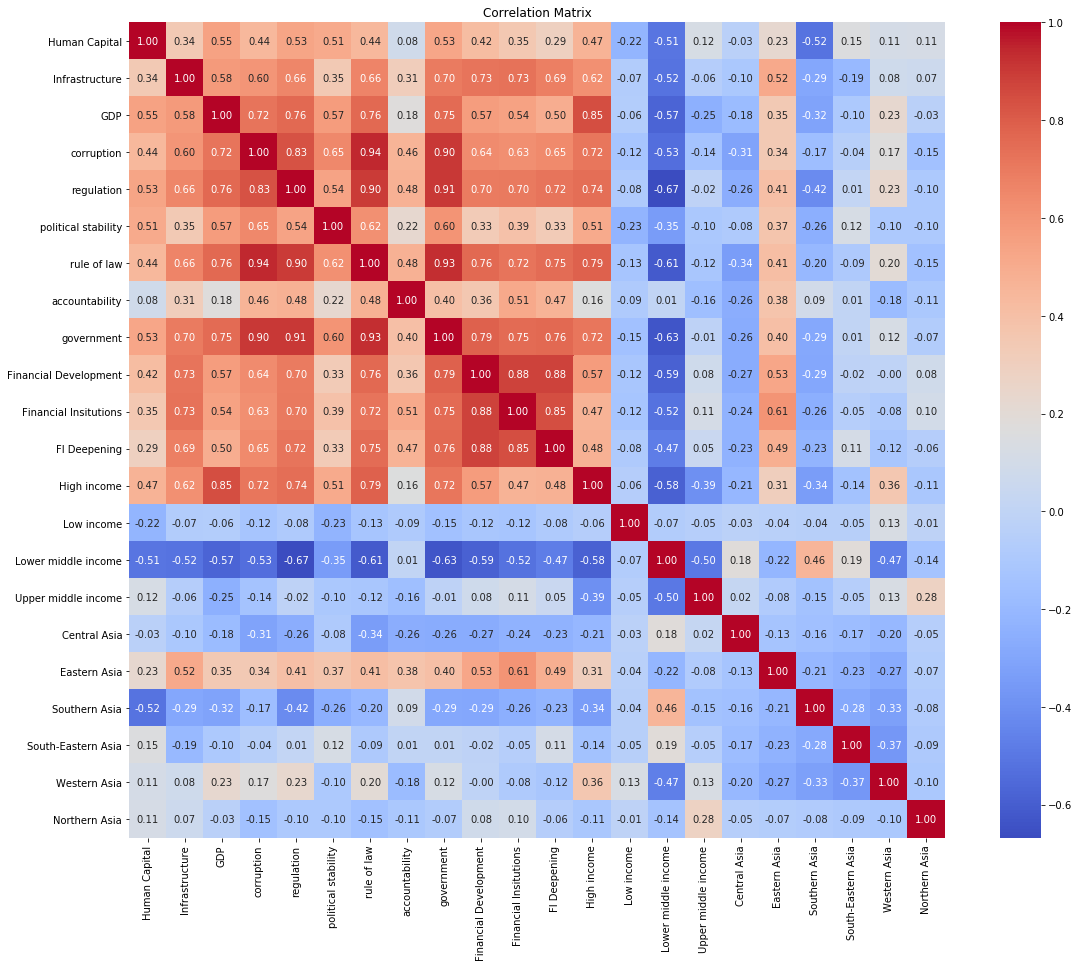

In [ ]:
# Threshold Corr > 0.95
X3 = X2.drop(columns=['labor force','GDP per capita',])
correlation_matrix = X3.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X4 = sm.add_constant(X3)
model = sm.OLS(y, X4).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               IFDI (%)   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     18.45
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.66e-44
Time:                        13:47:41   Log-Likelihood:                -422.80
No. Observations:                 398   AIC:                             887.6
Df Residuals:                     377   BIC:                             971.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [ ]:
# Threshold p value > 0.1
X5 = X3.drop(columns=['Human Capital','GDP','rule of law',])
X6 = sm.add_constant(X5)
model = sm.OLS(y, X6).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               IFDI (%)   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     21.69
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           5.78e-46
Time:                        13:47:42   Log-Likelihood:                -423.64
No. Observations:                 398   AIC:                             883.3
Df Residuals:                     380   BIC:                             955.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [ ]:
# Drop Dummy
X6 = X5.drop(columns=['High income','Central Asia','Eastern Asia','Southern Asia','South-Eastern Asia',
                      'Western Asia','Northern Asia'])
X7 = sm.add_constant(X6)
model = sm.OLS(y, X7).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               IFDI (%)   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     28.28
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           8.00e-46
Time:                        13:47:42   Log-Likelihood:                -432.82
No. Observations:                 398   AIC:                             891.6
Df Residuals:                     385   BIC:                             943.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.64

In [ ]:
# Drop Variable After See Coefficient
X7 = X6.drop(columns=['accountability','government','Financial Development','Financial Insitutions'])
X8 = sm.add_constant(X7)
model = sm.OLS(y, X8).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               IFDI (%)   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     18.53
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.47e-23
Time:                        13:47:42   Log-Likelihood:                -494.35
No. Observations:                 398   AIC:                             1007.
Df Residuals:                     389   BIC:                             1043.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5170    

In [ ]:
X9 = X6.drop(columns=['accountability','government','Financial Development','Financial Insitutions'])
X11 = X6.drop(columns=['accountability','government','Financial Development','Financial Insitutions'])

In [ ]:
# Add One More Variable (1)
X9['GDP per capita'] = X['GDP per capita']
X10 = sm.add_constant(X9)
model = sm.OLS(y, X10).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               IFDI (%)   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     16.46
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           6.02e-23
Time:                        13:47:43   Log-Likelihood:                -494.25
No. Observations:                 398   AIC:                             1009.
Df Residuals:                     388   BIC:                             1048.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5488    

In [ ]:
# Add One More Variable (2)
X11['accountability'] = X['accountability']
X12 = sm.add_constant(X11)
model = sm.OLS(y, X12).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               IFDI (%)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     21.31
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.88e-29
Time:                        13:47:43   Log-Likelihood:                -478.69
No. Observations:                 398   AIC:                             977.4
Df Residuals:                     388   BIC:                             1017.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8548    

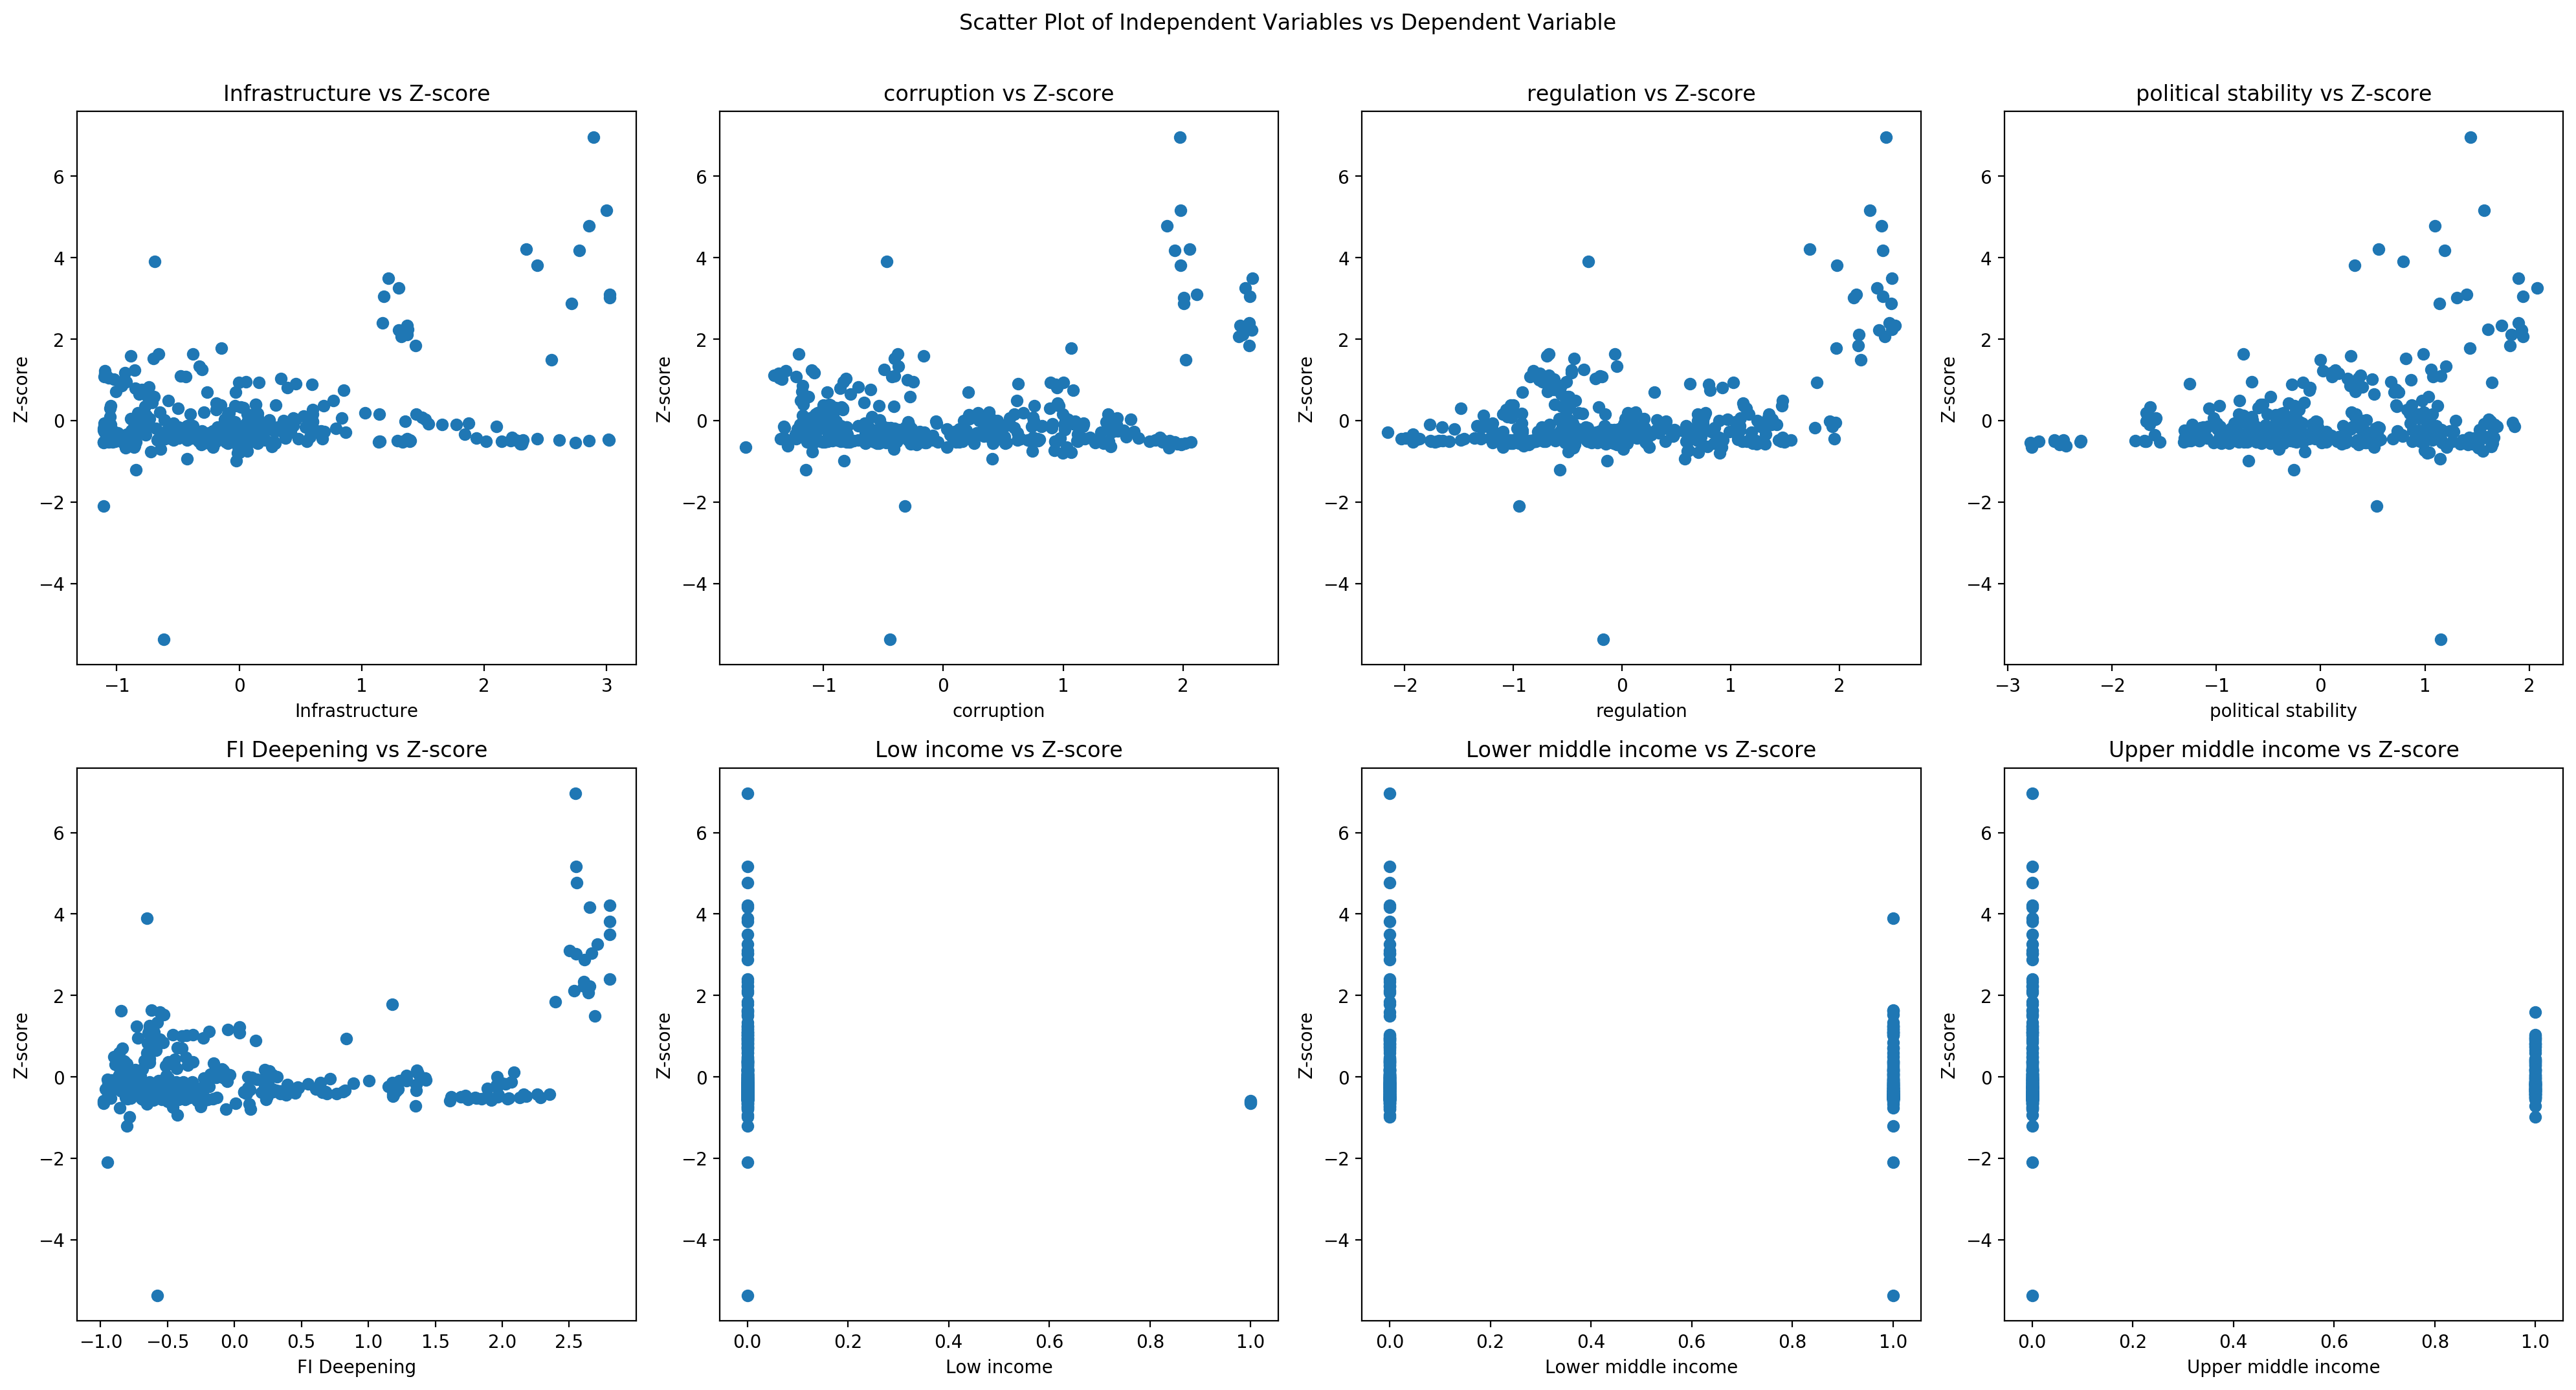

In [ ]:
''' Check Linear Relationship '''
# Plot dependent variable and independent variables
plt.figure(figsize=(20, 20), dpi=200)
plt.suptitle('Scatter Plot of Independent Variables vs Dependent Variable', y=1.02)
for i, col in enumerate(X7.columns):
    plt.subplot(4, 4, i + 1)
    plt.scatter(X7[col], y, alpha=1)
    plt.title(f'{col} vs Z-score')
    plt.xlabel(col)
    plt.ylabel('Z-score')
plt.tight_layout()
plt.show()

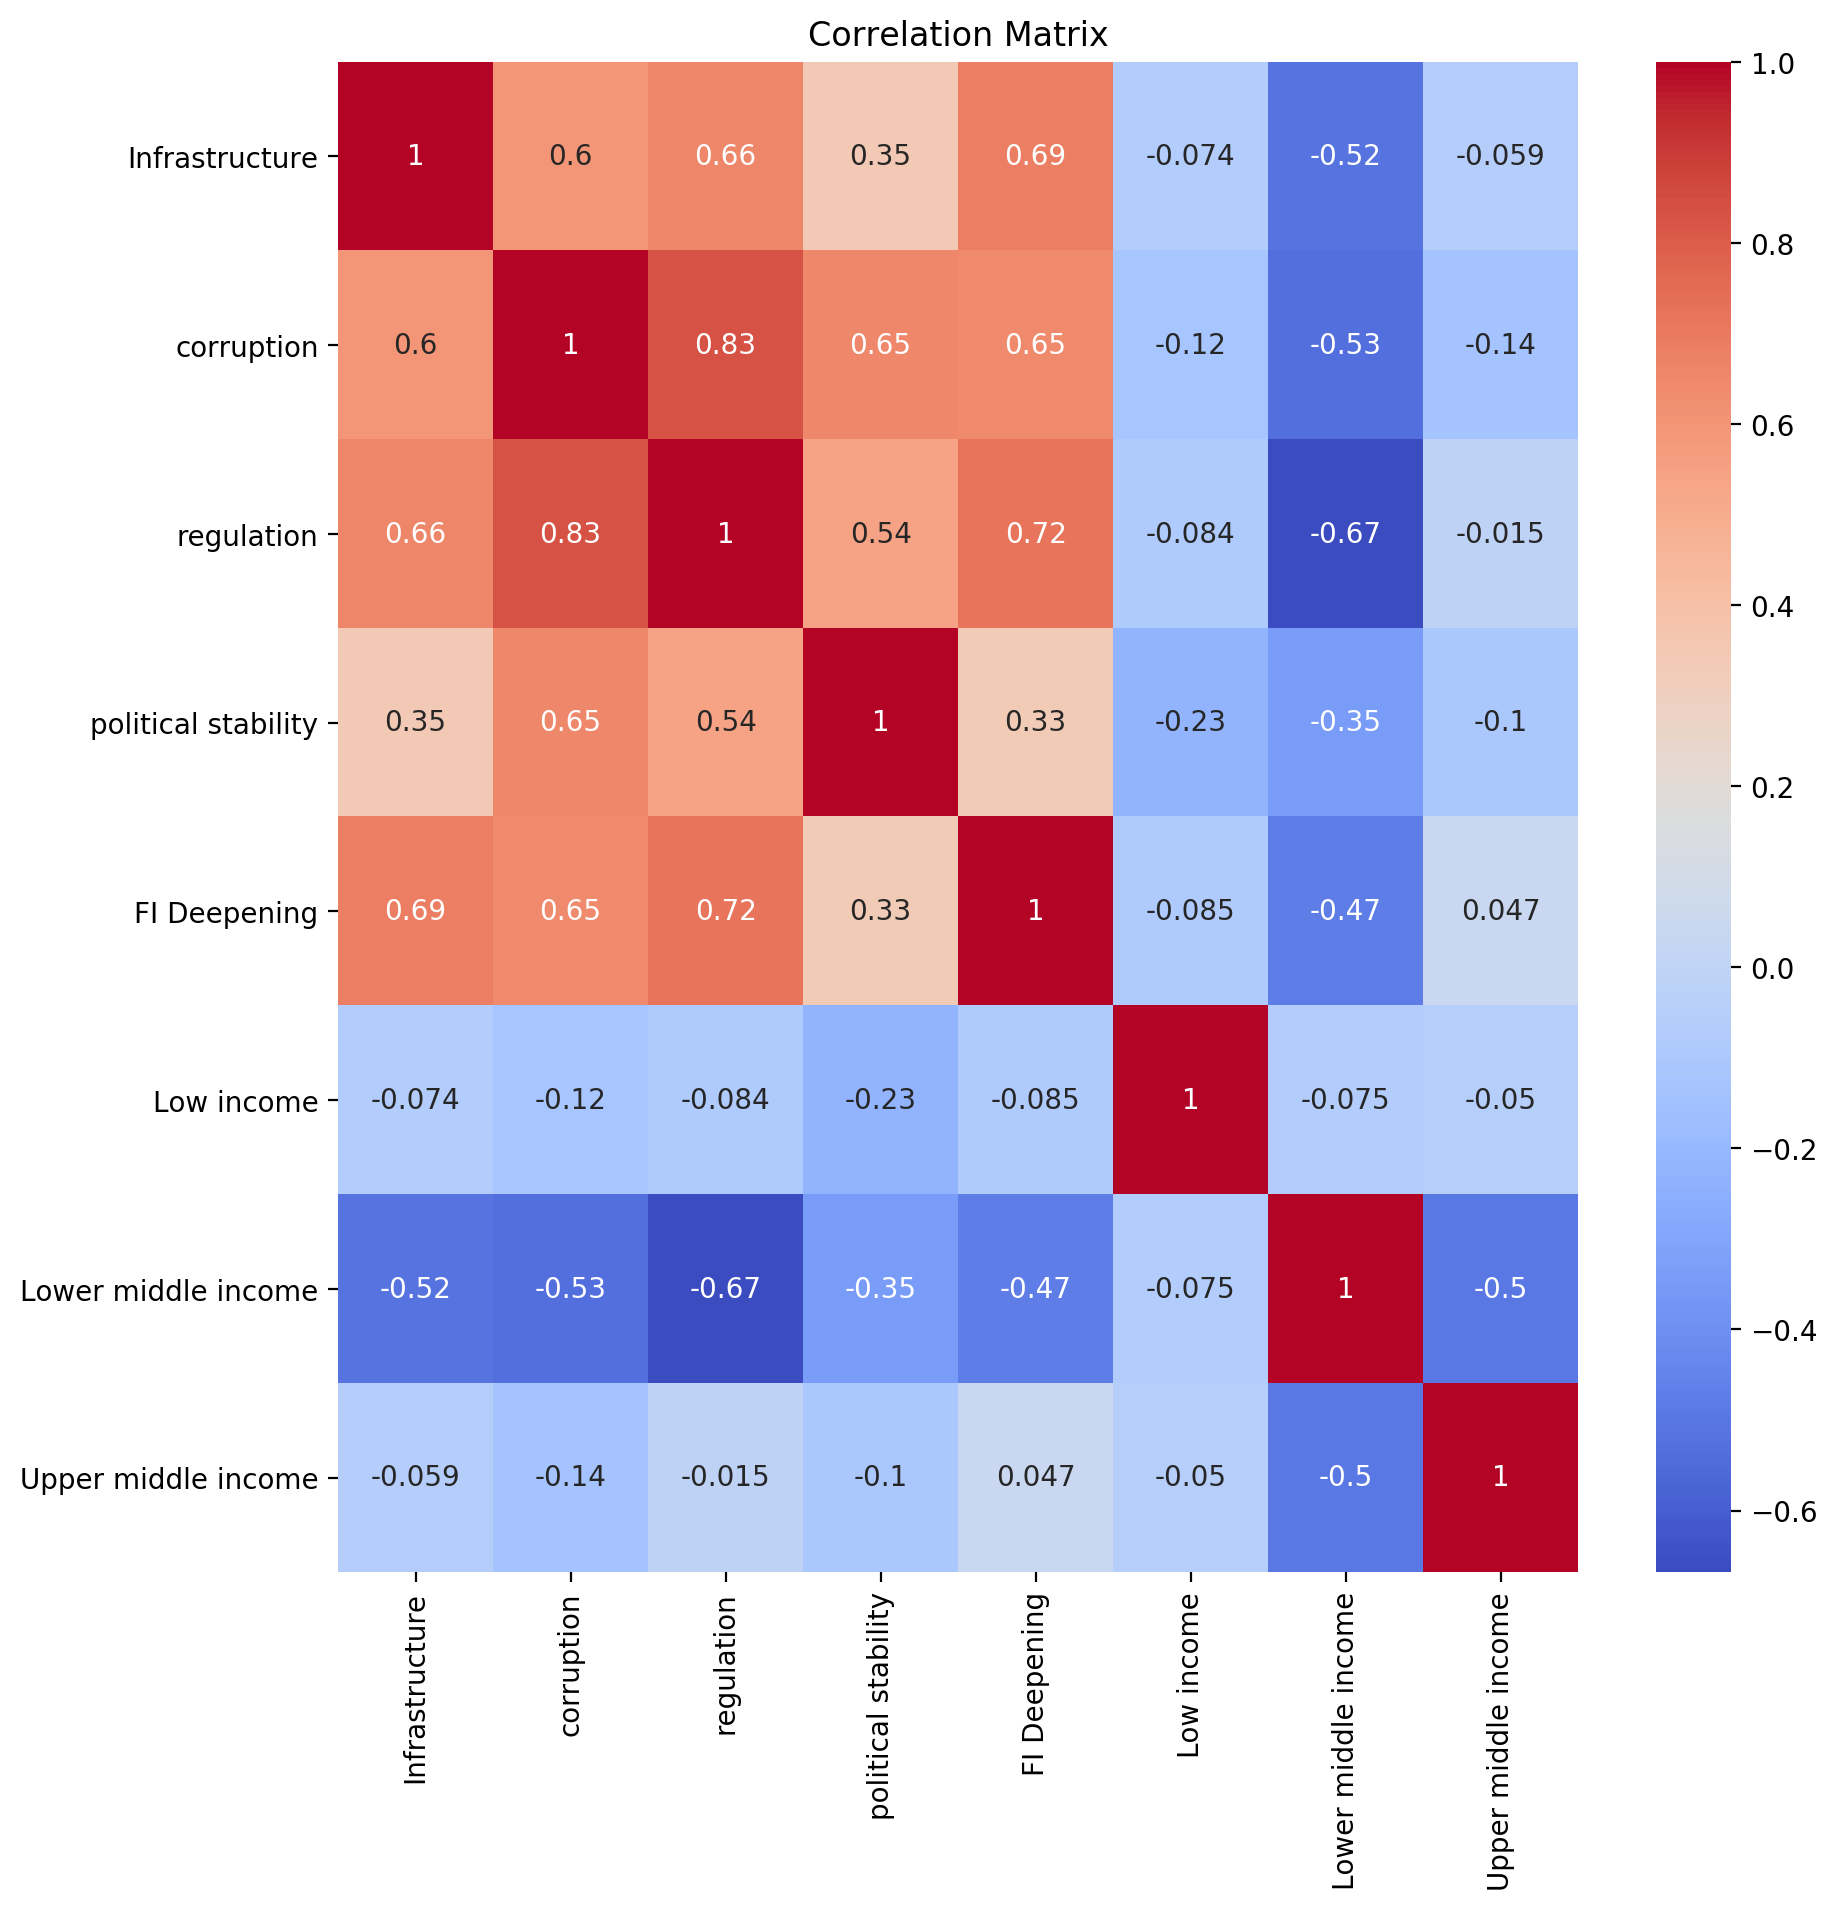

In [ ]:
''' Check Multi-collinearity '''
# Check Correlation Matrix
plt.figure(figsize=(10, 10), dpi=200)
plt.title('Correlation Matrix')
sns.heatmap(X7.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X7.columns
vif_data['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]

print(vif_data)

# VIF explanation
print("\nVIF explanation：")
print("VIF < 5：No serious multicollinearity")
print("5 <= VIF < 10：Moderate multicollinearity")
print("VIF >= 10：Serious multicollinearity, suggest handling")

# Identify variables that need to be handled
problematic_vars = vif_data[vif_data["VIF"] >= 10]["Variable"].tolist()
if problematic_vars:
    print(f"\nVariables need to be handled：{', '.join(problematic_vars)}")
else:
    print("\nAll variables' VIF values are within acceptable range")

              Variable       VIF
0       Infrastructure  2.149016
1           corruption  4.296718
2           regulation  4.647384
3  political stability  1.859952
4         FI Deepening  2.634343
5           Low income  1.061968
6  Lower middle income  1.365625
7  Upper middle income  1.054656

VIF explanation：
VIF < 5：No serious multicollinearity
5 <= VIF < 10：Moderate multicollinearity
VIF >= 10：Serious multicollinearity, suggest handling

All variables' VIF values are within acceptable range



Durbin-Watson Test results：
Durbin-Watson statistic：2.0127

Durbin-Watson statistic explanation：
0 to 2：Positive autocorrelation
2：No autocorrelation
2 to 4：Negative autocorrelation

Conclusion：No significant autocorrelation

Breusch-Pagan Test:
  Lagrange multiplier statistic: 58.30675503451546
  p-value: 1.000386531744205e-09
  f-value: 8.34625358488182
  f p-value: 1.811078346368657e-10

Short interpretation of results：
If the p-value is less than 0.05, the null hypothesis can be rejected, indicating the presence of heteroscedasticity.
If the p-value is greater than 0.05, the null hypothesis cannot be rejected, indicating no heteroscedasticity.
Kolmogorov-Smirnov Test:
  Statistic: 0.1628
  p-value: 0.0000

Short interpretation of results：
If the p-value is less than 0.05, the null hypothesis can be rejected, indicating that the residuals are not normally distributed.
If the p-value is greater than 0.05, the null hypothesis cannot be rejected, indicating that the residuals are norm

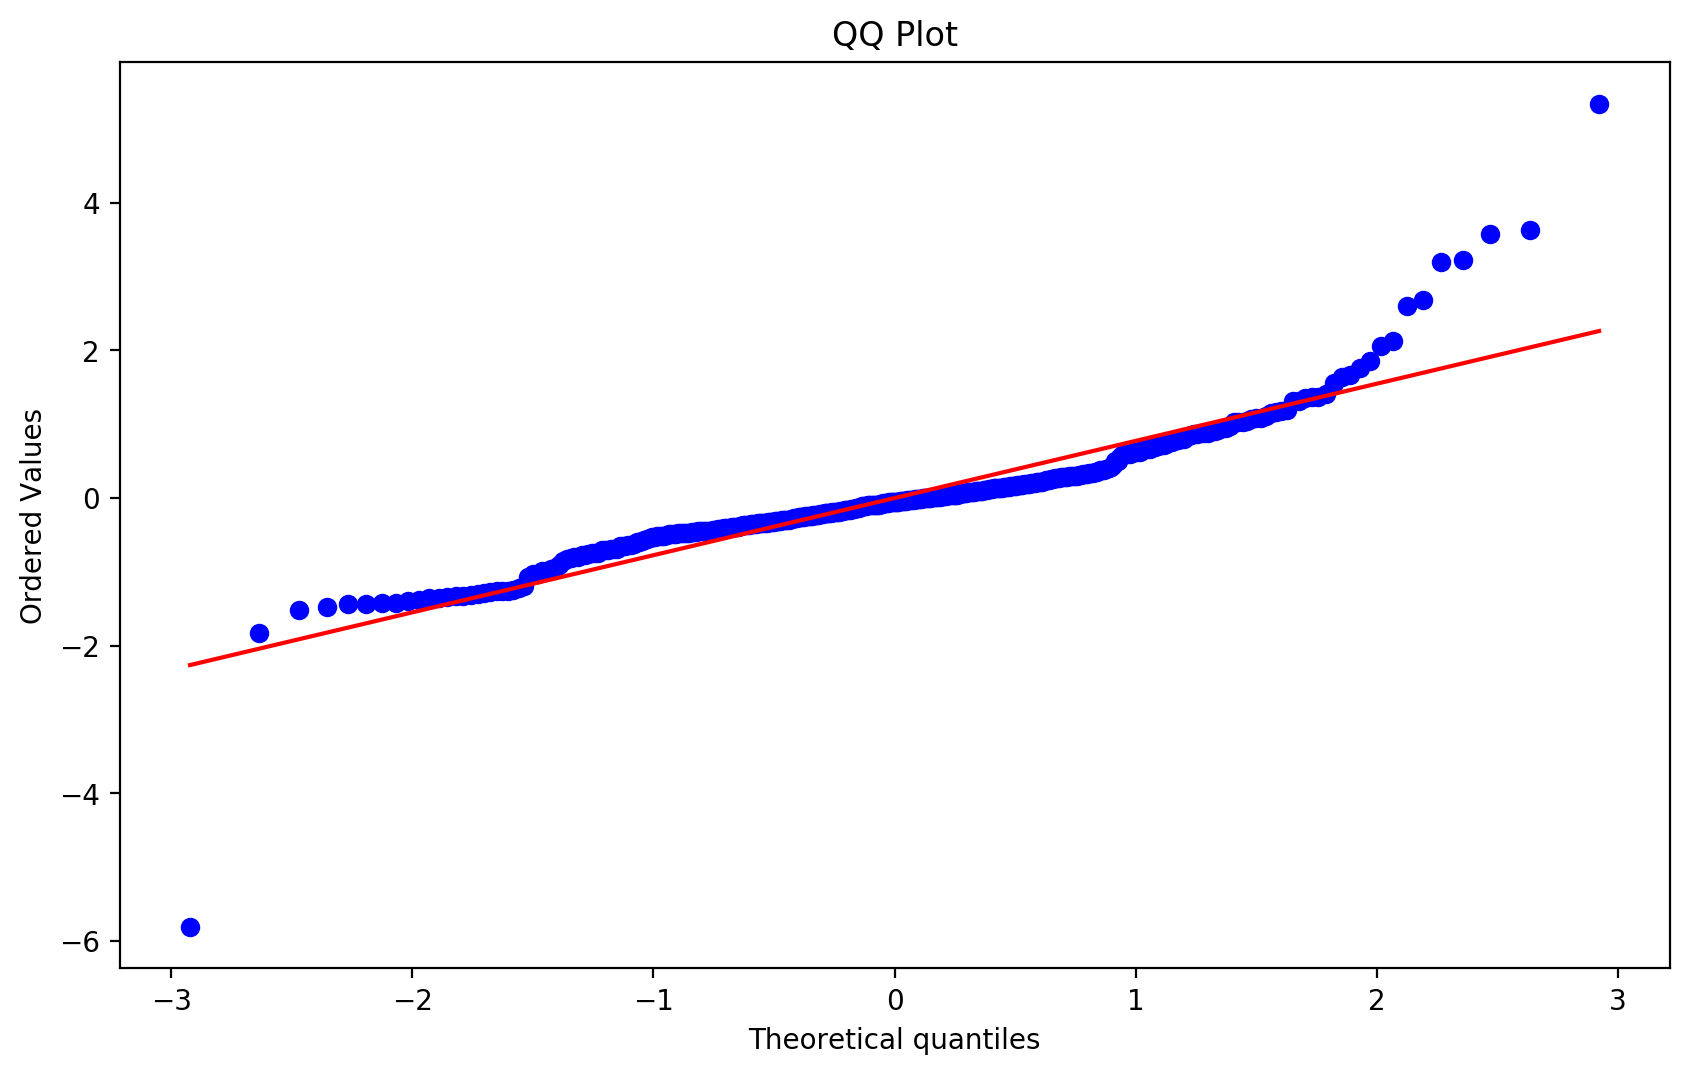

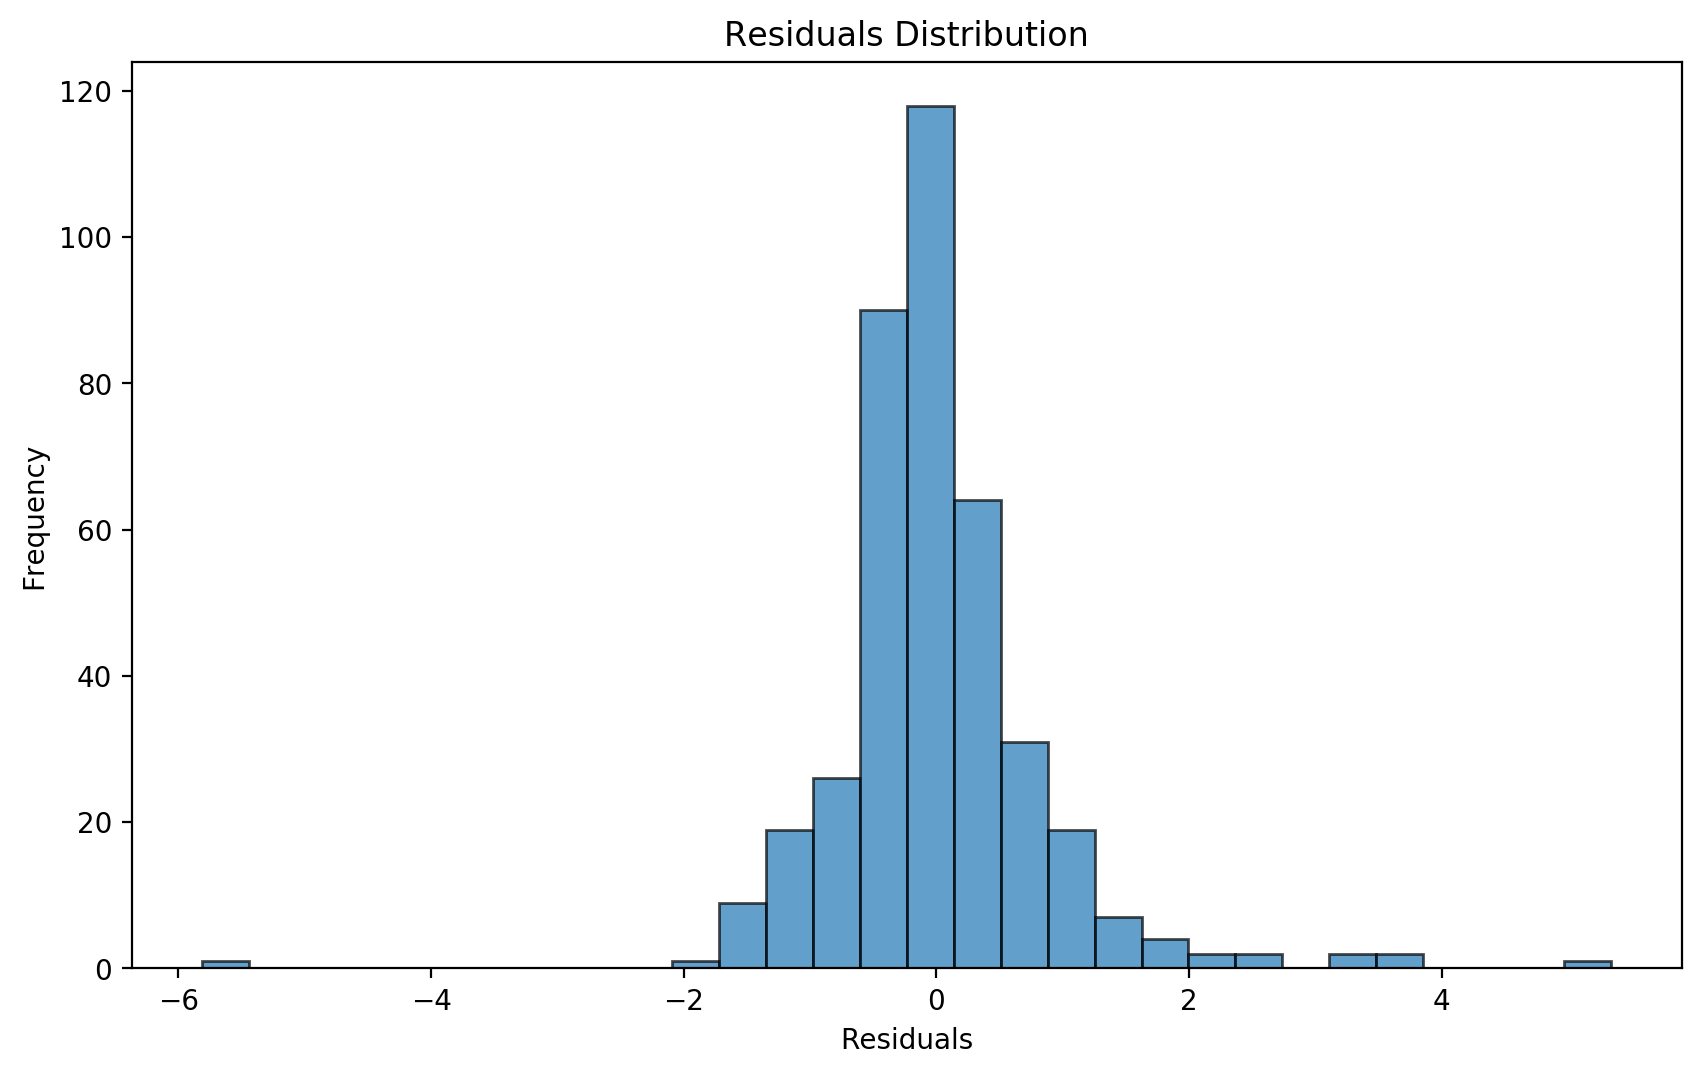

In [ ]:
''' Check Autocorrelation '''
# Check Durbin-Watson Test
# Fit regression model
model1 = sm.OLS(y, X8).fit()

# Calculate Durbin-Watson statistic
dw_statistic = durbin_watson(model1.resid)
print("\nDurbin-Watson Test results：")
print(f"Durbin-Watson statistic：{dw_statistic:.4f}")

# Durbin-Watson statistic explanation
print("\nDurbin-Watson statistic explanation：")
print("0 to 2：Positive autocorrelation")
print("2：No autocorrelation")
print("2 to 4：Negative autocorrelation")

if dw_statistic < 1.5:
    print("\nConclusion：Significant positive autocorrelation")
elif dw_statistic > 2.5:
    print("\nConclusion：Significant negative autocorrelation")
else:
    print("\nConclusion：No significant autocorrelation")


''' Check Heteroscedasticity '''
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model1.resid, model1.model.exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_result = dict(zip(labels, bp_test))

# Print Breusch-Pagan test results
print("\nBreusch-Pagan Test:")
for key, value in bp_result.items():
    print(f"  {key}: {value}")

# Short interpretation of results
print("\nShort interpretation of results：")
print("If the p-value is less than 0.05, the null hypothesis can be rejected, indicating the presence of heteroscedasticity.")
print("If the p-value is greater than 0.05, the null hypothesis cannot be rejected, indicating no heteroscedasticity.")

'''
Interpretation of results：
Lagrange multiplier statistic：This is the test statistic for the Breusch-Pagan test. It measures the degree of heteroscedasticity in the model. The value itself does not have a direct interpretation, but is used in conjunction with the p-value.
p-value：This is the p-value associated with the test statistic. It represents the probability of observing a test statistic as extreme as the one observed, assuming the null hypothesis (no heteroscedasticity) is true. Typically, a significance level of 0.05 is used. If the p-value is less than 0.05, the null hypothesis can be rejected, indicating the presence of heteroscedasticity.
f-value：This is the test statistic based on the F test. It measures the degree of heteroscedasticity. Like the Lagrange multiplier statistic, this value is primarily used in conjunction with its corresponding p-value.
f p-value：This is the p-value associated with the f-value. It is similar to the p-value interpretation of the Lagrange multiplier statistic.
'''


''' Check Residuals Distribution '''
# Kolmogorov-Smirnov Test
ks_statistic, ks_p_value = stats.kstest(model1.resid, 'norm')
print(f"Kolmogorov-Smirnov Test:")
print(f"  Statistic: {ks_statistic:.4f}")
print(f"  p-value: {ks_p_value:.4f}")
# Short interpretation of results
print("\nShort interpretation of results：")
print("If the p-value is less than 0.05, the null hypothesis can be rejected, indicating that the residuals are not normally distributed.")
print("If the p-value is greater than 0.05, the null hypothesis cannot be rejected, indicating that the residuals are normally distributed.")
# Long interpretation of results
print("\nLong interpretation of results：")
print("Statistic：This is the test statistic for the Kolmogorov-Smirnov test. It measures the maximum distance between the empirical cumulative distribution function (ECDF) of the residuals and the cumulative distribution function (CDF) of the normal distribution. The value itself does not have a direct interpretation, but is used in conjunction with the p-value.")
print("p-value：This is the p-value associated with the test statistic. It represents the probability of observing a test statistic as extreme as the one observed, assuming the null hypothesis (the residuals are normally distributed) is true. Typically, a significance level of 0.05 is used. If the p-value is less than 0.05, the null hypothesis can be rejected, indicating that the residuals are not normally distributed.")

# QQ Plot
plt.figure(figsize=(10, 6), dpi=200)
stats.probplot(model1.resid, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

# Residuals Distribution
plt.figure(figsize=(10, 6), dpi=200)
plt.hist(model1.resid, bins=30, edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Regression Model
finalmodel= sm.OLS(y, X8).fit()
# Display regression model summary
print(finalmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               IFDI (%)   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     18.53
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.47e-23
Time:                        13:47:49   Log-Likelihood:                -494.35
No. Observations:                 398   AIC:                             1007.
Df Residuals:                     389   BIC:                             1043.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5170    

In [ ]:
''' Clean up results '''
# Save Model 1 variables' Coefficient, Std. Error, p-value, VIF, and print the table
coefficients = finalmodel.params
p_values = finalmodel.pvalues

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X7.columns
vif_data["VIF"] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]

# Merge results
results_df = pd.DataFrame({
    "Coefficient": coefficients,
    "p-value": p_values
}).reset_index().rename(columns={"index": "Variable"})

# Merge VIF
results_df = results_df.merge(vif_data, on="Variable")

# Round values to four decimal places
results_df = results_df.round(4)

# Add stars based on significance
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    elif p < 0.1:
        return '.'
    else:
        return ''

results_df['p-value'] = results_df['p-value'].apply(lambda x: f"{x:.4f}{significance_stars(x)}")

# Print the table and explain the stars
print(results_df.to_markdown(showindex=False))
print("\nExplanation of the stars：")
print("***：Significant at the 0.1% level")
print("**：Significant at the 1% level")
print("*：Significant at the 5% level")
print(".: Significant at the 10% level")

| Variable            |   Coefficient | p-value   |    VIF |
|:--------------------|--------------:|:----------|-------:|
| Infrastructure      |        0.1471 | 0.0259*   | 2.149  |
| corruption          |       -0.1929 | 0.0322*   | 4.2967 |
| regulation          |        0.5398 | 0.0000*** | 4.6474 |
| political stability |        0.2058 | 0.0005*** | 1.86   |
| FI Deepening        |        0.1938 | 0.0068**  | 2.6343 |
| Low income          |        0.9872 | 0.0678.   | 1.062  |
| Lower middle income |        0.9321 | 0.0000*** | 1.3656 |
| Upper middle income |        0.4928 | 0.0015**  | 1.0547 |

Explanation of the stars：
***：Significant at the 0.1% level
**：Significant at the 1% level
*：Significant at the 5% level
.: Significant at the 10% level


In [ ]:
# Split Data for test
X_train, X_test, y_train, y_test = train_test_split(X8, y, test_size=0.3, random_state=42)

# Predict and Calculate MSE
y_pred_test = finalmodel.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"30% Random Sample MSE: {mse_test}")

30% Random Sample MSE: 0.5395687145787875


In [ ]:
# Predict and Calculate MSE
y_pred = finalmodel.predict(X8)
mse_test = mean_squared_error(y, y_pred)
print(f"Final Model MSE: {mse_test}")

Final Model MSE: 0.7020790988653419
